In [1]:
import pandas as pd

A rocket motor is manufactured by bonding an igniter propellant and a sustainer 
propellant together inside a metal housing. The shear strength of the bond between 
the two types of propellant is an important quality characteristic. It is suspected that 
shear strength is related to the age in weeks of the batch of sustainer propellant

In [2]:
shear_strength = pd.Series([2158.70,1678.15,2316.00,2061.30,2207.50,1708.30,1784.70,2575.00,2357.90,2256.70,2165.20,2399.55,1779.80,2336.75,1765.30,2053.50,2414.40,2200.50,2654.20,1753.70])

In [4]:
shear_strength

0     2158.70
1     1678.15
2     2316.00
3     2061.30
4     2207.50
5     1708.30
6     1784.70
7     2575.00
8     2357.90
9     2256.70
10    2165.20
11    2399.55
12    1779.80
13    2336.75
14    1765.30
15    2053.50
16    2414.40
17    2200.50
18    2654.20
19    1753.70
dtype: float64

In [5]:
age_of_propellent = pd.Series([15.50,23.75,8.0,17.00,5.50,19.0,24.0,2.50,7.50,11.0,13.0,3.75,25.0,9.75,22.0,18.0,6.0,12.50,2.00,21.50])

In [6]:
age_of_propellent

0     15.50
1     23.75
2      8.00
3     17.00
4      5.50
5     19.00
6     24.00
7      2.50
8      7.50
9     11.00
10    13.00
11     3.75
12    25.00
13     9.75
14    22.00
15    18.00
16     6.00
17    12.50
18     2.00
19    21.50
dtype: float64

In [49]:
data = {'Shear Strength':shear_strength,"Age of Propellent":age_of_propellent}
regression = pd.DataFrame(data=data)

In [50]:
regression

,Shear Strength,Age of Propellent
0,2158.70,15.50
1,1678.15,23.75
2,2316.00,8.00
3,2061.30,17.00
4,2207.50,5.50
5,1708.30,19.00
6,1784.70,24.00
7,2575.00,2.50
8,2357.90,7.50
9,2256.70,11.00


In [27]:
import matplotlib.pyplot as plt
import numpy as np

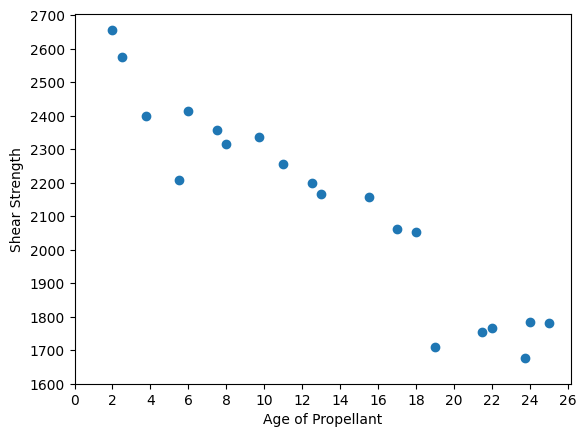

In [51]:
fig, ax = plt.subplots()
ax.scatter(regression['Age of Propellent'],regression['Shear Strength'])
ax.set_ylabel("Shear Strength")
ax.set_xlabel("Age of Propellant")
ax.set_xticks(np.arange(0,28,2))
ax.set_yticks(np.arange(1600,2800,100))


Estimating simple linear regression parameters with least-square estimators

In [32]:
regression

,Shear Strength,Age of Propellent
0,2158.70,15.50
1,1678.15,23.75
2,2316.00,8.00
3,2061.30,17.00
4,2207.50,5.50
5,1708.30,19.00
6,1784.70,24.00
7,2575.00,2.50
8,2357.90,7.50
9,2256.70,11.00


In [33]:
s_xx = np.array(regression['Age of Propellent'])

In [34]:
s_xx

array([15.5 , 23.75,  8.  , 17.  ,  5.5 , 19.  , 24.  ,  2.5 ,  7.5 ,
       11.  , 13.  ,  3.75, 25.  ,  9.75, 22.  , 18.  ,  6.  , 12.5 ,
        2.  , 21.5 ])

In [36]:
regression['Age of Propellent'].mean()

13.3625

In [40]:
squared_difference_x = (s_xx - regression['Age of Propellent'].mean())**2

In [52]:

squared_difference_x_multiplied_by_y = (s_xx - regression['Age of Propellent'].mean())*regression['Shear Strength']

In [53]:
squared_difference_x_multiplied_by_y

0      4614.221250
1     17431.783125
2    -12419.550000
3      7497.978750
4    -17356.468750
5      9630.541250
6     18984.746250
7    -27970.937500
8    -13823.188750
9     -5331.453750
10     -784.885000
11   -23065.674375
12    20712.422500
13    -8441.509375
14    15247.778750
15     9523.106250
16   -17776.020000
17    -1897.931250
18   -30158.347500
19    14270.733750
Name: Shear Strength, dtype: float64

In [54]:
regression['S_xx'] = squared_difference_x
regression['S_xy'] = squared_difference_x_multiplied_by_y

In [55]:
regression

,Shear Strength,Age of Propellent,S_xx,S_xy
0,2158.70,15.50,4.568906,4614.221250
1,1678.15,23.75,107.900156,17431.783125
2,2316.00,8.00,28.756406,-12419.550000
3,2061.30,17.00,13.231406,7497.978750
4,2207.50,5.50,61.818906,-17356.468750
5,1708.30,19.00,31.781406,9630.541250
6,1784.70,24.00,113.156406,18984.746250
7,2575.00,2.50,117.993906,-27970.937500
8,2357.90,7.50,34.368906,-13823.188750
9,2256.70,11.00,5.581406,-5331.453750


In [56]:
regression['S_xx'].sum()

1106.559375

In [57]:
regression['S_xy'].sum()

-41112.654375000035

In [59]:
beta_1_estimated = regression['S_xy'].sum()/regression['S_xx'].sum()
beta_1_estimated

-37.15359094490527

In [ ]:
beta_1_estimated

In [63]:
beta_0_estimated = regression['Shear Strength'].mean()- beta_1_estimated*regression['Age of Propellent'].mean() 
beta_0_estimated

2627.8223590012963

13.3625

In [64]:
regression['Observed Value'] = regression['Shear Strength']

In [66]:
regression['Fitted Value'] = beta_0_estimated + beta_1_estimated*np.array(regression['Age of Propellent'])

In [68]:
regression['Residual e'] = regression['Observed Value'] - regression['Fitted Value']

In [69]:
regression

,Shear Strength,Age of Propellent,S_xx,S_xy,Observed Value,Fitted Value,Residual e
0,2158.70,15.50,4.568906,4614.221250,2158.70,2051.941699,106.758301
1,1678.15,23.75,107.900156,17431.783125,1678.15,1745.424574,-67.274574
2,2316.00,8.00,28.756406,-12419.550000,2316.00,2330.593631,-14.593631
3,2061.30,17.00,13.231406,7497.978750,2061.30,1996.211313,65.088687
4,2207.50,5.50,61.818906,-17356.468750,2207.50,2423.477609,-215.977609
5,1708.30,19.00,31.781406,9630.541250,1708.30,1921.904131,-213.604131
6,1784.70,24.00,113.156406,18984.746250,1784.70,1736.136176,48.563824
7,2575.00,2.50,117.993906,-27970.937500,2575.00,2534.938382,40.061618
8,2357.90,7.50,34.368906,-13823.188750,2357.90,2349.170427,8.729573
9,2256.70,11.00,5.581406,-5331.453750,2256.70,2219.132859,37.567141


In [71]:
regression['Residual e'].sum()

7.503331289626658e-12

In [72]:
(regression['Observed Value'] - regression['Fitted Value']).sum()

7.503331289626658e-12

Properties of the least-squares fit:

1. Sum of residuals is 0

In [ ]:
(regression['Observed Value'] - regression['Fitted Value']).sum()

2. The sum of observed values is equal to fitted values

In [73]:
regression['Observed Value'].sum()

42627.149999999994

In [74]:
regression['Fitted Value'].sum()

42627.14999999998

3. The least-squares regression line always passes through centroid ( the point (x_mean,y_mean))

In [79]:
np.array(beta_0_estimated+beta_1_estimated*regression['Age of Propellent'])

array([2051.94169936, 1745.42457406, 2330.59363144, 1996.21131294,
       2423.4776088 , 1921.90413105, 1736.13617632, 2534.93838164,
       2349.17042691, 2219.13285861, 2144.82567672, 2488.49639296,
       1698.98258538, 2265.57484729, 1810.44335821, 1959.05772199,
       2404.90081333, 2163.40247219, 2553.51517711, 1829.02015369])

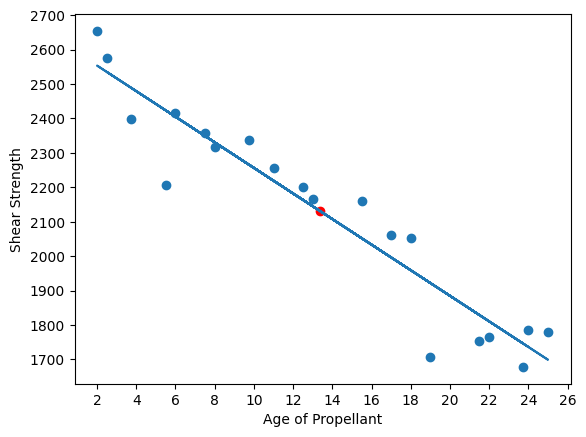

In [84]:
fig, ax = plt.subplots()
ax.scatter(regression['Age of Propellent'],regression['Shear Strength'])
ax.set_ylabel("Shear Strength")
ax.set_xlabel("Age of Propellant")
ax.set_xticks(np.arange(0,28,2))
ax.set_yticks(np.arange(1600,2800,100))
ax.plot()
ax.plot(regression['Age of Propellent'],np.array(beta_0_estimated+beta_1_estimated*regression['Age of Propellent']))
ax.scatter(regression['Age of Propellent'].mean(),regression['Shear Strength'].mean(),c='r')

4. The sum of residuals weighted by respective regressor value is 0

In [85]:
(regression['Residual e']*regression['Age of Propellent']).sum()

1.325588527834043e-10

5. The sum of residuals weighted by respective fitted value is zero

In [86]:
(regression['Residual e']*regression['Fitted Value']).sum()

1.4842953532934189e-08

Estimating Variance

In [102]:
y_mean_squared = regression['Shear Strength'].mean()**2
y_mean_squared

4542684.792806248

In [103]:
n_sample_length = len(regression['Shear Strength'])
n_sample_length

20

In [104]:
SS_t = ( (regression['Shear Strength']**2) - n_sample_length*y_mean_squared)
SS_t.sum()

-1724526483.6649995

In [106]:
regression['Observed value squared'] = regression['Observed Value']**2

In [114]:
regression['Error_squares'] = regression['Observed value squared'] - y_mean_squared/n_sample_length

In [126]:
regression

,Shear Strength,Age of Propellent,S_xx,S_xy,Observed Value,Fitted Value,Residual e,Observed value squared,Error_squares
0,2158.70,15.50,4.568906,4614.221250,2158.70,2051.941699,106.758301,4.659986e+06,4.432851e+06
1,1678.15,23.75,107.900156,17431.783125,1678.15,1745.424574,-67.274574,2.816187e+06,2.589053e+06
2,2316.00,8.00,28.756406,-12419.550000,2316.00,2330.593631,-14.593631,5.363856e+06,5.136722e+06
3,2061.30,17.00,13.231406,7497.978750,2061.30,1996.211313,65.088687,4.248958e+06,4.021823e+06
4,2207.50,5.50,61.818906,-17356.468750,2207.50,2423.477609,-215.977609,4.873056e+06,4.645922e+06
5,1708.30,19.00,31.781406,9630.541250,1708.30,1921.904131,-213.604131,2.918289e+06,2.691155e+06
6,1784.70,24.00,113.156406,18984.746250,1784.70,1736.136176,48.563824,3.185154e+06,2.958020e+06
7,2575.00,2.50,117.993906,-27970.937500,2575.00,2534.938382,40.061618,6.630625e+06,6.403491e+06
8,2357.90,7.50,34.368906,-13823.188750,2357.90,2349.170427,8.729573,5.559692e+06,5.332558e+06
9,2256.70,11.00,5.581406,-5331.453750,2256.70,2219.132859,37.567141,5.092695e+06,4.865561e+06


In [130]:
regression = regression.drop(columns=["Error_squares"])

In [139]:
(regression['Observed value squared'].sum() - ((regression['Observed Value'].sum())**2)/n_sample_length)

1693737.6013750285

In [141]:
SS_t = (regression['Observed value squared'].sum() - ((regression['Observed Value'].sum())**2)/n_sample_length)
SS_t

1693737.6013750285

Residual sum of squares = SS_t - Beta_1_estimated*S_xy

In [144]:
SS_res = SS_t - beta_1_estimated*regression['S_xy'].sum()
SS_res

166254.85806700727

Variance = SS_res / n-2

In [146]:
var = SS_res / (n_sample_length-2)
var

9236.381003722627